In [ ]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")
mnist
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

5.0


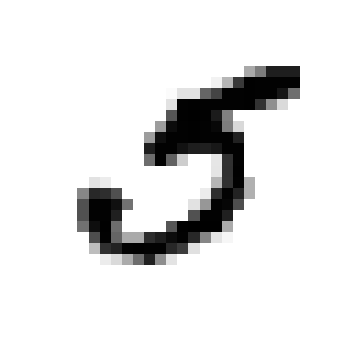

In [ ]:
import random
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[36000]
print(mnist.target[36000])
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42) 
sgd_clf.fit(X_train, y_train_5)
sgd_clf.predict([some_digit])

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfold = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfold.split(X=X_train, y=y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))

0.95465
0.9677
0.9663


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3)

array([ 0.95465,  0.9677 ,  0.9663 ])

In [ ]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)
from sklearn.metrics import precision_score, recall_score
print("precision:",precision_score(y_train_5, y_train_pred), "recall:", 
recall_score(y_train_5, y_train_pred))
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

In [ ]:
y_scores = sgd_clf.decision_function([some_digit])
print("y_scores:",y_scores)
threshold=0
y_some_digit_pred = (y_scores > threshold)
print("y_some_digit_pred:",y_some_digit_pred)
threshold = 200000
y_some_digit_pred = (y_scores>threshold)
print(y_some_digit_pred)

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, 
                             method="decision_function")
y_scores

array([[       0.        , -1276038.60219255],
       [       0.        ,  -237011.49260498],
       [       0.        ,   -68427.07178696],
       ..., 
       [       0.        ,    10020.94028145],
       [       0.        ,  -185040.52768605],
       [       0.        ,   165058.03001822]])

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_train_5, y_scores[:,1])

print("precision:",precision)
print("recall:",recall)
print("threshold:",threshold)

precision: [ 0.0906643   0.09064909  0.09065061 ...,  1.          1.          1.        ]
recall: [  1.00000000e+00   9.99815532e-01   9.99815532e-01 ...,   3.68935621e-04
   1.84467810e-04   0.00000000e+00]
threshold: [-1720572.79401569 -1720446.37547629 -1719916.91509902 ...,
   914118.07509305   921985.3680759    942798.02378121]


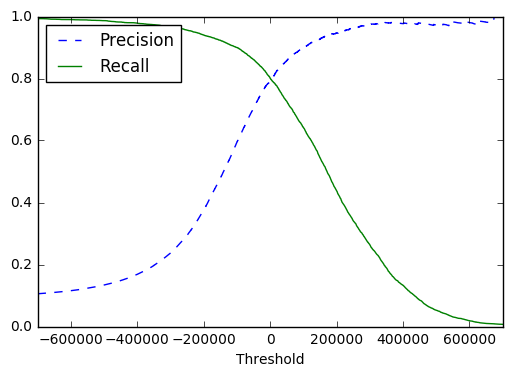

In [19]:
def plot_precision_recall_vs_threshold(precision,recall,threshold): 
    plt.plot(threshold, precision[:-1],"b--",label ="Precision") 
    plt.plot(threshold, recall[:-1],"g-",label ="Recall") 
    plt.xlabel("Threshold") 
    plt.legend(loc ="upper left") 
    plt.ylim([0,1]) 
plot_precision_recall_vs_threshold(precision,recall,threshold)  
plt.xlim([-700000, 700000])
plt.figure(figsize=(8, 4))
plt.show()

In [ ]:
y_train_pred == (y_scores > 0).all()
y_train_pred_90 = (y_scores > 70000)
precision_score(y_train_5,y_train_pred_90[:,1])
recall_score(y_train_5, y_train_pred_90[:,1])
precision_score(y_train_5, y_train_pred)
recall_score(y_train_5, y_train_pred)

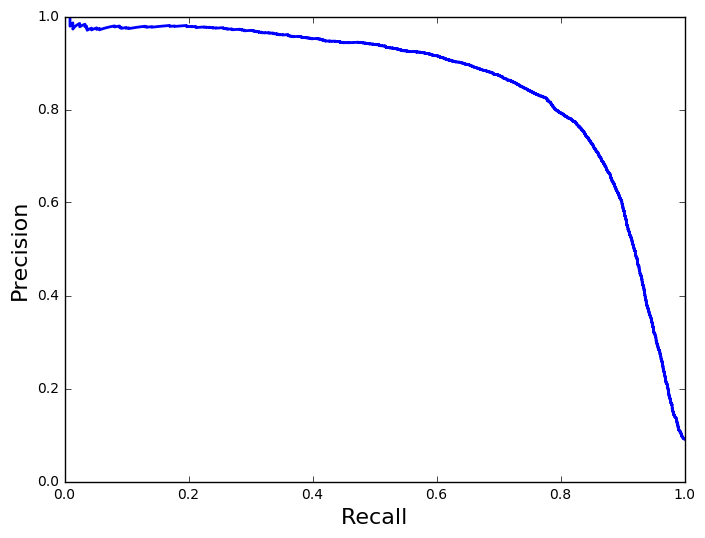

In [26]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precision, recall)
plt.show()

In [27]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_train_5, y_scores[:,1])

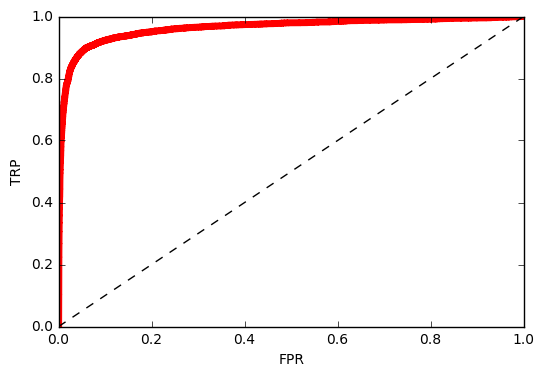

In [28]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr,'r-', linewidth=5,label=label)
    plt.plot([0,1],[0,1],'k--') #나중에 auc설명하기 위해서..(Area Under a ROC Curve)
    plt.axis([0,1,0,1])
    plt.xlabel("FPR")
    plt.ylabel("TRP")

plot_roc_curve(fpr,tpr)
plt.show()